In [10]:
from sklearn                 import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble        import RandomForestRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import LogisticRegression
from sklearn                 import preprocessing
from sklearn.metrics         import r2_score
from pandas.core.frame       import DataFrame
from sklearn.linear_model    import Lasso

import numpy                 as np
import matplotlib.pyplot     as plt
import pandas


In [13]:
import pandas

columns = ['face_x', 'face_y','face_width','face_height','face_cam_x', 'face_cam_y','face_cam_z',
          'torso_x','torso_y','torso_width','torso_height','torso_cam_x','torso_cam_y','torso_cam_z',
          'person_x','person_y','person_width','person_height','person_cam_x','person_cam_y','person_cam_z',
        'mean_cam_z']
df = pandas.read_csv('data.csv')
df_test = pandas.read_csv('test_data.csv')
#df = pandas.DataFrame(data.values, columns=columns)

df.head()

,face_x,face_y,face_width,face_height,face_cam_x,face_cam_y,face_cam_z,torso_x,torso_y,torso_width,...,torso_cam_y,torso_cam_z,person_x,person_y,person_width,person_height,person_cam_x,person_cam_y,person_cam_z,mean_cam_z
0,570.0,156.0,59.0,46.0,3.222619,-0.699850,6.235,-1.0,-1.0,-1.0,...,NaN,NaN,494.0,136.0,342.0,144.0,3.890177,-0.371194,6.124,6.1795
1,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,...,NaN,NaN,359.0,130.0,348.0,190.0,2.626809,-0.200039,6.592,6.5920
2,294.0,116.0,83.0,54.0,0.035208,-0.143189,0.812,-1.0,-1.0,-1.0,...,NaN,NaN,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,0.8120
3,264.0,68.0,111.0,76.0,0.077445,-1.279389,5.282,166.0,143.0,333.0,...,0.319593,8.995,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,7.1385
4,519.0,11.0,156.0,116.0,2.151638,-1.291524,4.192,308.0,107.0,371.0,...,0.264356,6.468,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,5.3300


In [32]:
import numpy as np

# preparing data
face_X = df[['face_x',  'face_y', 'face_width', 'face_height']].values
torso_X = df[['torso_x',  'torso_y',  'torso_width',  'torso_height']].values
person_X = df[['person_x', 'person_y', 'person_width', 'person_height']].values

face_X_test = df_test[['face_x',  'face_y', 'face_width', 'face_height']].values
torso_X_test = df_test[['torso_x',  'torso_y',  'torso_width',  'torso_height']].values
person_X_test = df_test[['person_x', 'person_y', 'person_width', 'person_height']].values

face_y_test = df_test['face_cam_z'].values
torso_y_test = df_test['torso_cam_z'].values
person_y_test = df_test['person_cam_z'].values

X = [face_X, torso_X, person_X]
Y = [face_y, torso_y, person_y]

X_test = [face_X_test, torso_X_test, person_X_test]
Y_test = [face_y_test, torso_y_test, person_y_test]

for i, (x, y) in enumerate(zip(X, Y)):
    keep = ~np.isnan(y)    
    X[i] = x[keep,:]
    Y[i] = y[keep]
    print(X[i].shape, Y[i].shape)
    
for i, (x, y) in enumerate(zip(X_test, Y_test)):
    keep = ~np.isnan(y)    
    X_test[i] = x[keep,:]
    Y_test[i] = y[keep]
    print(X_test[i].shape, Y_test[i].shape)


((265, 4), (265,))
((209, 4), (209,))
((207, 4), (207,))
((15, 4), (15,))
((1, 4), (1,))
((0, 4), (0,))


(265,)
(209,)
(207,)


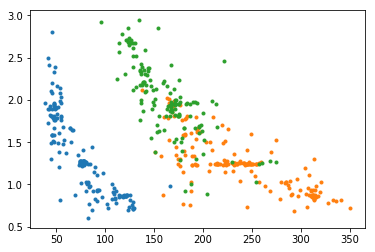

In [17]:
import matplotlib.pyplot as plt

# remove long data
for i, (x, y) in enumerate(zip(X, Y)):
    print(y.shape)
    short_data = y < 3.
    Y[i] = y[short_data]
    X[i] = x[short_data, :]    
    #print(y.shape)

for i in range(3):
    plt.plot(X[i][:,3],Y[i],'.')
plt.show()

In [4]:
from sklearn.model_selection import cross_val_score

# Best possible score is 1.0 and it can be negative 
# (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.

def get_scores(X, y, cv, estimator, scoring='r2'):

    return cross_val_score(estimator=estimator, 
                        X=X, 
                        y=y, 
                        cv=cv,
                        scoring=scoring)

In [5]:
#  random forest Regressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=10, shuffle=True)

face_scores_rfr   = get_scores(X[0][:,2:], Y[0], kf, RandomForestRegressor(n_estimators=100) )
torso_scores_rfr  = get_scores(X[1][:,2:], Y[1], kf, RandomForestRegressor(n_estimators=100) )
person_scores_rfr = get_scores(X[2][:,2:], Y[2], kf, RandomForestRegressor(n_estimators=100) )

print('Face: ',   np.mean(face_scores_rfr))
print('Torso: ',  np.mean(torso_scores_rfr))
print('Person: ', np.mean(person_scores_rfr))

('Face: ', 0.7097672468533921)
('Torso: ', 0.5318028492634292)
('Person: ', 0.43077002827834826)


In [36]:
rgr = RandomForestRegressor(n_estimators=100)
rgr.fit(X[0][:,2:], Y[0])
y_pred = rgr.predict(X_test[0][:,2:])
y_true = Y_test[0]
r2_score(y_pred=y_pred,y_true=y_true)

-3.13458637028625

In [41]:
Y_test[0]

array([0.672, 1.342, 1.649, 1.272, 0.653, 1.69 , 1.177, 1.169, 1.142,
       1.673, 0.625, 0.675, 0.65 , 1.732, 1.768])

In [6]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

lr = LogisticRegression(C = 500, solver = 'lbfgs', penalty='l2', max_iter = 1000)

face_scores_lr   = get_scores(preprocessing.scale(X[0][:,2:]), np.round(1000*Y[0]), kf, lr)
torso_scores_lr  = get_scores(preprocessing.scale(X[1][:,2:]), np.round(1000*Y[1]), kf, lr)
person_scores_lr = get_scores(preprocessing.scale(X[2][:,2:]), np.round(1000*Y[2]), kf, lr)

print('Face: ',   np.mean(face_scores_lr))
print('Torso: ',  np.mean(torso_scores_lr))
print('Person: ', np.mean(person_scores_lr))

/home/konstantin/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


('Face: ', 0.42757069107828405)
('Torso: ', 0.22724674029009323)
('Person: ', 0.20967597506888952)


In [37]:
rgr = LogisticRegression(C = 500, solver = 'lbfgs', penalty='l2', max_iter = 1000)
rgr.fit(preprocessing.scale(X[0][:,2:]), np.round(1000*Y[0]))
y_pred = rgr.predict(preprocessing.scale(X_test[0][:,2:]))
y_true = np.round(1000*Y_test[0])
r2_score(y_pred=y_pred,y_true=y_true)

-91.8185273716835

In [7]:
# logistic regression2
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

lr = LogisticRegression(C = 1000, solver = 'lbfgs', penalty='l2', max_iter = 1000)

face_scores_lr   = get_scores(X[0][:,2:] / np.array([620, 480]), np.round(10*Y[0]), kf, lr)
torso_scores_lr  = get_scores(X[1][:,2:] / np.array([620, 480]), np.round(10*Y[1]), kf, lr)
person_scores_lr = get_scores(X[2][:,2:] / np.array([620, 480]), np.round(10*Y[2]), kf, lr)

print('Face: ',   np.mean(face_scores_lr))
print('Torso: ',  np.mean(torso_scores_lr))
print('Person: ', np.mean(person_scores_lr))

('Face: ', 0.594539349275242)
('Torso: ', 0.28556010952791244)
('Person: ', 0.43307408604166164)


In [38]:
rgr = LogisticRegression(C = 1000, solver = 'lbfgs', penalty='l2', max_iter = 1000)
rgr.fit(X[0][:,2:] / np.array([620, 480]), np.round(10*Y[0]))
y_pred = rgr.predict(X_test[0][:,2:]/ np.array([620, 480]))
y_true = np.round(10*Y_test[0])
r2_score(y_pred=y_pred,y_true=y_true)

-0.6104959075589793

In [8]:
# simple neuronet
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(100, 100, 100),tol=1e-2, max_iter=1000)
kf = KFold(n_splits=2, shuffle=True)

face_scores_nn   = get_scores(preprocessing.scale(X[0][:,2:]), Y[0], kf, nn)
torso_scores_nn  = get_scores(preprocessing.scale(X[1][:,2:]), Y[1], kf, nn)
person_scores_nn = get_scores(preprocessing.scale(X[2][:,2:]), Y[2], kf, nn)

print('Face: ',   np.mean(face_scores_nn))
print('Torso: ',  np.mean(torso_scores_nn))
print('Person: ', np.mean(person_scores_nn))

('Face: ', 0.6294095367923629)
('Torso: ', 0.33263683215660833)
('Person: ', 0.46741062123792515)


In [39]:
rgr = MLPRegressor(hidden_layer_sizes=(100, 100, 100),tol=1e-2, max_iter=1000)
rgr.fit(preprocessing.scale(X[0][:,2:]), Y[0])
y_pred = rgr.predict(preprocessing.scale(X_test[0][:,2:]))
y_true = Y_test[0]
r2_score(y_pred=y_pred,y_true=y_true)

-12.825600644200838